In [234]:
import pandas as pd
import numpy as np
import os
from datetime import timedelta, date
from ast import literal_eval
from matplotlib import pyplot as plt

# load transaction data
trans_df = pd.read_csv('../../../data/cabot_data/sprint_3/trans_s3_raw.csv',
                       parse_dates=['LOOK_DATE'])

# load predicted lambdas
lamb_df = pd.read_csv('/Users/johngao/work/thesis/em-hotel-demand-estimation/EM_extension/model/sprint4/sprint4_results.csv')

In [235]:
# get binary value from purchases
trans_df['PURCHASE_COUNT'] = trans_df['PRODUCT'].astype(str) != 'nan'
trans_df['PURCHASE_COUNT'] = trans_df.apply(lambda row: 1 if row['PURCHASE_COUNT'] == True else 0, axis=1)

# get look weeks and look_dow
trans_df['LOOK_WEEK'] = trans_df.apply(lambda row: row['LOOK_DATE'].week, axis=1)
trans_df['LOOK_DOW'] = trans_df.apply(lambda row: row['LOOK_DATE'].dayofweek, axis=1)

# transform look day into numbers
trans_df['LOOK_DOY'] = trans_df.apply(lambda row: row['LOOK_DATE'].dayofyear - 1, axis=1)

# process predicted lambdas
num_days = 299
lamb_df = lamb_df.iloc[lamb_df.index > len(lamb_df) - (num_days + 1),:]
lamb_df = lamb_df.reset_index().drop(['index','var'], axis=1)
lamb_df['LOOK_DOY'] = lamb_df.index + 1
lamb_df = lamb_df.rename(index=str, columns={" value": "pred_lambda"})

# merge predicted lambdas into main df
trans_df = trans_df.merge(lamb_df, on='LOOK_DOY')

# get daily counts and diff
daily_count = trans_df.groupby('LOOK_DOY').sum()
daily_count['diff'] = daily_count['PURCHASE_COUNT'] - daily_count['pred_lambda']

# get weekly counts and diff
weekly_count = trans_df.groupby('LOOK_WEEK').sum()
weekly_count['diff'] = weekly_count['PURCHASE_COUNT'] - weekly_count['pred_lambda']

# get dow counts and diff
dow_count = trans_df.groupby('LOOK_DOW').sum()
dow_count['diff'] = dow_count['PURCHASE_COUNT'] - dow_count['pred_lambda']


In [236]:
weekly_count

,INTRADAY,PURCHASE_COUNT,LOOK_DOW,LOOK_DOY,pred_lambda,diff
LOOK_WEEK,,,,,,
1,19926,60,1701,1701,66.204216,-6.204216
2,23247,156,1701,5670,112.921371,43.078629
3,23247,162,1701,9639,119.272581,42.727419
4,23247,171,1701,13608,122.110821,48.889179
5,23247,113,1701,17577,99.968013,13.031987
6,23247,191,1701,21546,138.818691,52.181309
7,23247,162,1701,25515,130.302675,31.697325
8,23247,104,1701,29484,103.524156,0.475844
9,23247,152,1701,33453,128.263500,23.736500


In [ ]:
# save figure for daily differences
plt.figure(figsize=(20,60))
plt.barh(daily_count.index, daily_count['diff'], align='center', alpha=0.5)
plt.yticks(daily_count.index)
plt.ylabel('Look_Day')
plt.xlabel('Count vs Predicted count difference')
plt.title('Look_day vs predicted count difference')
plt.savefig('daily_count_diff.png', format='png')
plt.show()

In [ ]:
# save figure for weekly differences
plt.figure(figsize=(20,20))
plt.barh(weekly_count.index, weekly_count['diff'], align='center', alpha=0.5, color='g')
plt.yticks(weekly_count.index)
plt.ylabel('Look_week')
plt.xlabel('Count vs Predicted count difference')
plt.title('Look_week vs predicted count difference')
plt.savefig('weekly_count_diff.png', format='png')
plt.show()

In [ ]:
# save figure for weekly differences
plt.figure(figsize=(20,10))
plt.barh(dow_count.index, dow_count['diff'], align='center', alpha=0.5, color='r')
plt.yticks(dow_count.index)
plt.ylabel('Look_dow')
plt.xlabel('Count vs Predicted count difference')
plt.title('Look_dow vs predicted count difference')
plt.savefig('dow_count_diff.png', format='png')
plt.show()

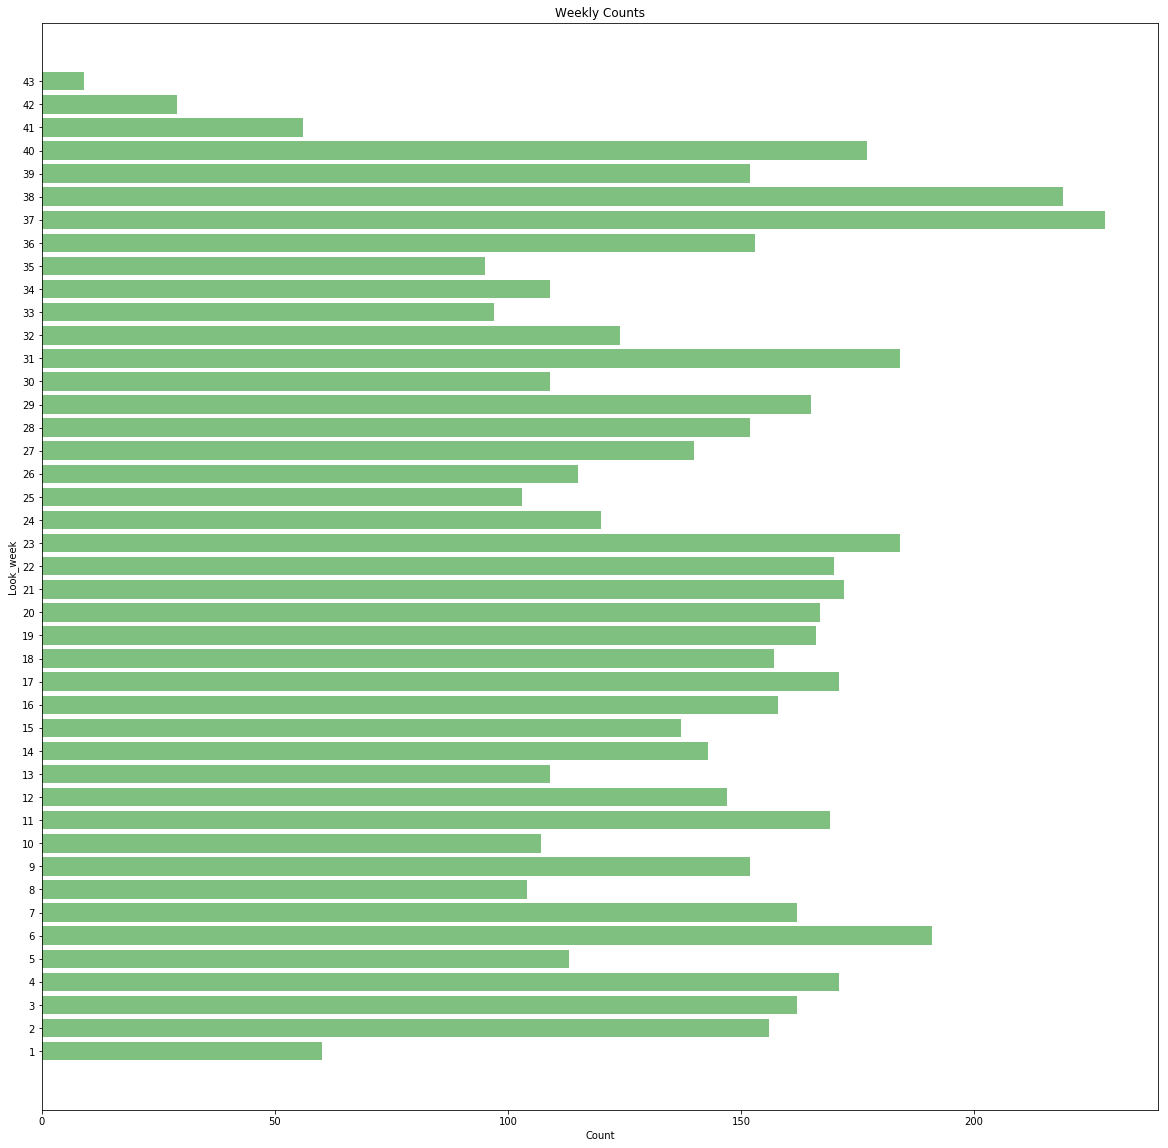

In [238]:
# save figure for weekly differences
plt.figure(figsize=(20,20))
plt.barh(weekly_count.index, weekly_count['PURCHASE_COUNT'], align='center', alpha=0.5, color='g')
plt.yticks(weekly_count.index)
plt.ylabel('Look_week')
plt.xlabel('Count')
plt.title('Weekly Counts')
plt.savefig('weekly_counts.png', format='png')
plt.show()

In [ ]:
counts_df_daily = trans_df[['LOOK_DATE', 'PURCHASE_TF', 'LOOK_WEEK']]

In [ ]:
counts_df_daily = counts_df_daily.groupby('LOOK_DATE').sum()

In [220]:
daily_count

,LOOK_DOW,diff
LOOK_DOY,,
1,81,3.774239
2,162,-1.298204
3,243,-3.234078
4,324,-8.420355
5,405,4.663538
6,486,-1.689356
7,0,7.619153
8,81,4.619153
9,162,3.619153
